In [49]:
import numpy as np
import pandas as pd

In [50]:
# previous processing
loans = pd.read_csv('https://raw.githubusercontent.com/OpenClassrooms-Student-Center/en-8253136-Use-Python-Libraries-for-Data-Science/main/data/loans.csv')

# calculate the debt-to-income ratio
loans['debt_to_income'] = round(loans['repayment'] * 100 / loans['income'], 2)

# rename rate to interest_rate
loans.rename(columns={'rate':'interest_rate'}, inplace=True)

# calculate the total cost of the loan
loans['total_cost'] = loans['repayment'] * loans['term']

# calculate monthly profits generated
loans['profit'] = round((loans['total_cost'] * loans['interest_rate']/100)/(24), 2)

# create the risk variable
loans['risk'] = 'No'
loans.loc[loans['debt_to_income'] > 35, 'risk'] = 'Yes'

# customer profile DataFrame
customer_profile = loans.groupby('identifier')[['repayment','debt_to_income','total_cost','profit']].sum()
customer_profile.reset_index(inplace=True)
customer_profile.head()

loans.head()

,identifier,city,zip code,income,repayment,term,type,interest_rate,debt_to_income,total_cost,profit,risk
0,0,CHICAGO,60100,3669.0,1130.05,240,real estate,1.168,30.80,271212.0,131.99,No
1,1,DETROIT,48009,5310.0,240.00,64,automobile,3.701,4.52,15360.0,23.69,No
2,1,DETROIT,48009,5310.0,1247.85,300,real estate,1.173,23.50,374355.0,182.97,No
3,2,SAN FRANCISCO,94010,1873.0,552.54,240,real estate,0.972,29.50,132609.6,53.71,No
4,3,SAN FRANCISCO,94010,1684.0,586.03,180,real estate,1.014,34.80,105485.4,44.57,No


In [51]:
customers_1 = pd.read_csv('https://raw.githubusercontent.com/OpenClassrooms-Student-Center/en-8253136-Use-Python-Libraries-for-Data-Science/main/data/customers.csv')
customers_1.head()

,identifier,email,name,gender
0,0,JohnSmith@rhyta.com,John Smith,M
1,1,MaryJohnson@fleckens.hu,Mary Johnson,F
2,2,WilliamBrown@einrot.com,William Brown,M
3,3,JamesLee@armyspy.com,James Lee,M
4,4,PatriciaGarcia@rhyta.com,Patricia Garcia,F


In [52]:
customers_2 = pd.read_csv('https://raw.githubusercontent.com/OpenClassrooms-Student-Center/en-8253136-Use-Python-Libraries-for-Data-Science/main/data/customers_cont.csv')
customers_2.head()


,identifier,email,name,gender
0,150,EricHayes@teleworm.us,Eric Hayes,M
1,151,MonaMoreno@armyspy.com,Mona Moreno,F
2,152,VincentCraig@einrot.com,Vincent Craig,M
3,153,GlendaParsons@cuvox.de,Glenda Parsons,F
4,154,RogerWatkins@dayrep.com,Roger Watkins,M


In [53]:
customers = pd.concat([customers_1,customers_2] , ignore_index=True)

In [54]:
customers

,identifier,email,name,gender
0,0,JohnSmith@rhyta.com,John Smith,M
1,1,MaryJohnson@fleckens.hu,Mary Johnson,F
2,2,WilliamBrown@einrot.com,William Brown,M
3,3,JamesLee@armyspy.com,James Lee,M
4,4,PatriciaGarcia@rhyta.com,Patricia Garcia,F
...,...,...,...,...
223,223,GordonFreeman@cuvox.de,Gordon Freeman,M
224,224,AgnesWelch@armyspy.com,Agnes Welch,F
225,225,MarionStokes@teleworm.us,Marion Stokes,M
226,226,GinaBeck@fleckens.hu,Gina Beck,F


In [55]:
customers.shape

(228, 4)

In [56]:
customer_profile = pd.merge(customers, loans ,  on = "identifier")

In [57]:
customer_profile


,identifier,email,name,gender,city,zip code,income,repayment,term,type,interest_rate,debt_to_income,total_cost,profit,risk
0,0,JohnSmith@rhyta.com,John Smith,M,CHICAGO,60100,3669.0,1130.05,240,real estate,1.168,30.80,271212.0,131.99,No
1,1,MaryJohnson@fleckens.hu,Mary Johnson,F,DETROIT,48009,5310.0,240.00,64,automobile,3.701,4.52,15360.0,23.69,No
2,1,MaryJohnson@fleckens.hu,Mary Johnson,F,DETROIT,48009,5310.0,1247.85,300,real estate,1.173,23.50,374355.0,182.97,No
3,2,WilliamBrown@einrot.com,William Brown,M,SAN FRANCISCO,94010,1873.0,552.54,240,real estate,0.972,29.50,132609.6,53.71,No
4,3,JamesLee@armyspy.com,James Lee,M,SAN FRANCISCO,94010,1684.0,586.03,180,real estate,1.014,34.80,105485.4,44.57,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,224,AgnesWelch@armyspy.com,Agnes Welch,F,DETROIT,48008,5118.0,1248.79,300,real estate,1.206,24.40,374637.0,188.26,No
240,224,AgnesWelch@armyspy.com,Agnes Welch,F,DETROIT,48008,5118.0,238.20,25,automobile,3.423,4.65,5955.0,8.49,No
241,225,MarionStokes@teleworm.us,Marion Stokes,M,BALTIMORE,21100,2356.0,876.43,180,real estate,1.172,37.20,157757.4,77.04,Yes
242,226,GinaBeck@fleckens.hu,Gina Beck,F,DETROIT,48002,5098.0,2910.96,240,real estate,1.140,57.10,698630.4,331.85,Yes


In [58]:
customers_age = pd.read_csv('https://raw.githubusercontent.com/OpenClassrooms-Student-Center/en-8253136-Use-Python-Libraries-for-Data-Science/main/data/customers_age.csv')
customers_age.head()

,identifier,age
0,0,54
1,1,23
2,2,3
3,3,42
4,4,47


In [59]:
data

,identifier,email,name,gender,city,zip code,income,repayment,term,type,interest_rate,debt_to_income,total_cost,profit,risk,age
0,0,JohnSmith@rhyta.com,John Smith,M,CHICAGO,60100,3669.0,1130.05,240,real estate,1.168,30.80,271212.0,131.99,No,54.0
1,1,MaryJohnson@fleckens.hu,Mary Johnson,F,DETROIT,48009,5310.0,240.00,64,automobile,3.701,4.52,15360.0,23.69,No,23.0
2,1,MaryJohnson@fleckens.hu,Mary Johnson,F,DETROIT,48009,5310.0,1247.85,300,real estate,1.173,23.50,374355.0,182.97,No,23.0
3,2,WilliamBrown@einrot.com,William Brown,M,SAN FRANCISCO,94010,1873.0,552.54,240,real estate,0.972,29.50,132609.6,53.71,No,3.0
4,3,JamesLee@armyspy.com,James Lee,M,SAN FRANCISCO,94010,1684.0,586.03,180,real estate,1.014,34.80,105485.4,44.57,No,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,224,AgnesWelch@armyspy.com,Agnes Welch,F,DETROIT,48008,5118.0,1248.79,300,real estate,1.206,24.40,374637.0,188.26,No,27.0
240,224,AgnesWelch@armyspy.com,Agnes Welch,F,DETROIT,48008,5118.0,238.20,25,automobile,3.423,4.65,5955.0,8.49,No,27.0
241,225,MarionStokes@teleworm.us,Marion Stokes,M,BALTIMORE,21100,2356.0,876.43,180,real estate,1.172,37.20,157757.4,77.04,Yes,29.0
242,226,GinaBeck@fleckens.hu,Gina Beck,F,DETROIT,48002,5098.0,2910.96,240,real estate,1.140,57.10,698630.4,331.85,Yes,26.0


In [60]:
import matplotlib.pyplot as plt

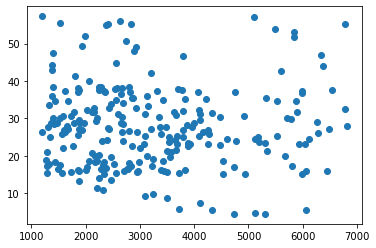

In [61]:
plt.scatter(data["income"] , data["debt_to_income"])

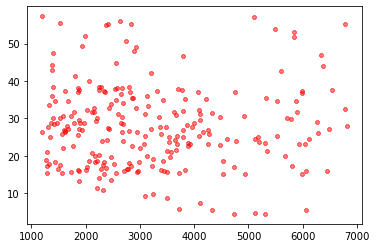

In [62]:
plt.scatter(data["income"] , data["debt_to_income"] , s=10 , c = "red" , alpha = 0.5 , marker = "P")

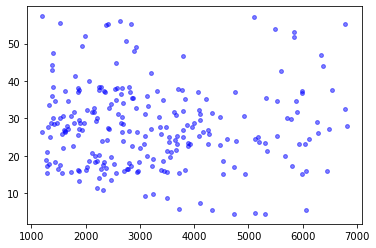

In [63]:
plt.scatter(data["income"] , data["debt_to_income"] , s=60 , c = "blue" , alpha = 0.5 , marker = ".")

In [64]:
data = loans.groupby("city")["repayment"].sum()

In [65]:
data

city
BALTIMORE        15330.59
CHICAGO          19286.18
DETROIT          94052.61
NEW YORK CITY    23544.24
SAN FRANCISCO    40895.72
SEATTLE          26064.67
Name: repayment, dtype: float64

In [66]:
data = data.reset_index()


([<matplotlib.patches.Wedge at 0x12b1185a340>,
 [Text(1.0735482898052735, 0.2397792098080497, 'BALTIMORE'),
  Text(0.829928171886456, 0.7219551436960646, 'CHICAGO'),
  Text(-0.765521246489669, 0.7899222880593404, 'DETROIT'),
  Text(-0.6970241371381706, -0.8509743546351964, 'NEW YORK CITY'),
  Text(0.25868913251599157, -1.0691491629880856, 'SAN FRANCISCO'),
  Text(1.0241193749093163, -0.4014716751345624, 'SEATTLE')])

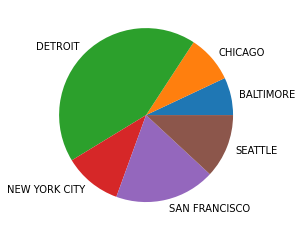

In [67]:
plt.pie(x=data["repayment"], labels = data["city"])

([<matplotlib.patches.Wedge at 0x12b118b0370>,
 [Text(1.0735482898052735, 0.2397792098080497, 'BALTIMORE'),
  Text(0.829928171886456, 0.7219551436960646, 'CHICAGO'),
  Text(-0.765521246489669, 0.7899222880593404, 'DETROIT'),
  Text(-0.6970241371381706, -0.8509743546351964, 'NEW YORK CITY'),
  Text(0.25868913251599157, -1.0691491629880856, 'SAN FRANCISCO'),
  Text(1.0241193749093163, -0.4014716751345624, 'SEATTLE')],
 [Text(0.58557179443924, 0.1307886598952998, '6.99%'),
  Text(0.45268809375624863, 0.39379371474330793, '8.80%'),
  Text(-0.41755704353981943, 0.430866702577822, '42.91%'),
  Text(-0.38019498389354756, -0.4641678298010162, '10.74%'),
  Text(0.14110316319054084, -0.5831722707207738, '18.66%'),
  Text(0.5586105681323542, -0.21898455007339765, '11.89%')])

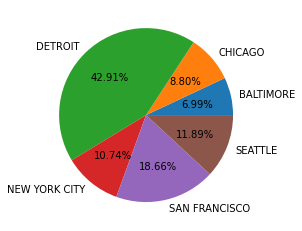

In [68]:
plt.pie(x=data["repayment"], labels = data["city"] , autopct = "%.2f%%")

<BarContainer object of 6 artists>

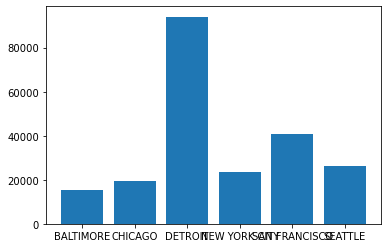

In [69]:
plt.bar(height = data["repayment"] , x=data["city"] )

In [70]:
data_sorted = data.sort_values('repayment' , ascending = False)

<BarContainer object of 6 artists>

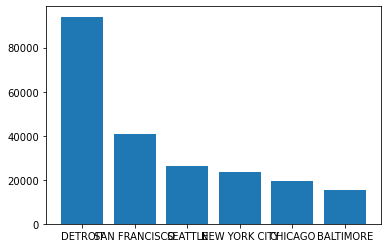

In [71]:
plt.bar( height = data_sorted["repayment"], x=data_sorted["city"])

In [72]:
data = pd.merge(customer_profile , customers_age , on='identifier', how ="left" )

(array([38., 42., 43., 27., 31., 17., 10., 11., 15., 10.]),
 array([1200. , 1760.7, 2321.4, 2882.1, 3442.8, 4003.5, 4564.2, 5124.9,
        5685.6, 6246.3, 6807. ]),
 <BarContainer object of 10 artists>)

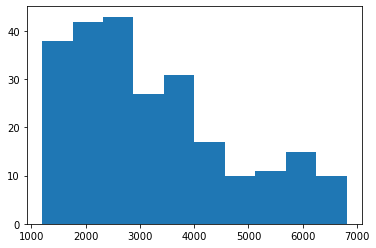

In [73]:
plt.hist(data["income"])

In [75]:
revenue_change = ({ "date" : [" 2024-01-01" , " 2024-02-01" , " 2024-03-01" , " 2024-04-01"] , "revenue" : [12000 ,15000 , 7000 , 18000] })

In [76]:
revenue_change

,date,revenue
0,2024-01-01,12000
1,2024-02-01,15000
2,2024-03-01,7000
3,2024-04-01,18000


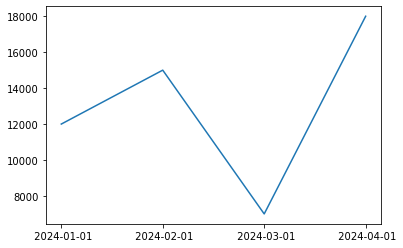

In [77]:
plt.plot(revenue_change["date"] , revenue_change["revenue"])

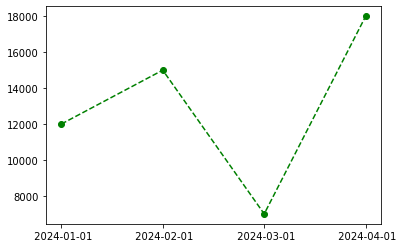

In [79]:
plt.plot(revenue_change["date"] , revenue_change["revenue"] , marker ="o" , ls="--" , color = "green")

In [84]:
dt1 = loans.loc[loans["city"] == "DETROIT" , :]
dt2 = loans.loc[loans["city"] == "CHICAGO", :]

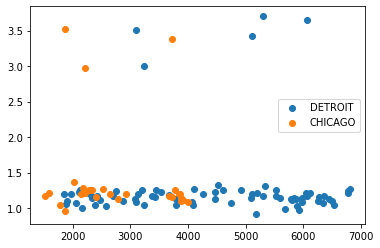

In [87]:
plt.scatter(dt1["income"] , dt1["interest_rate"] , label = "DETROIT")
plt.scatter(dt2["income"] , dt2["interest_rate"] , label = "CHICAGO")
plt.legend()

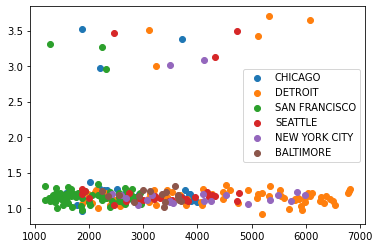

In [89]:
for city in loans["city"].unique():
    df = loans.loc[loans["city"] == city]
    plt.scatter(df["income"] , df["interest_rate"] , label = city)

plt.legend()

In [90]:
import seaborn as sns


<AxesSubplot:xlabel='income', ylabel='debt_to_income'>

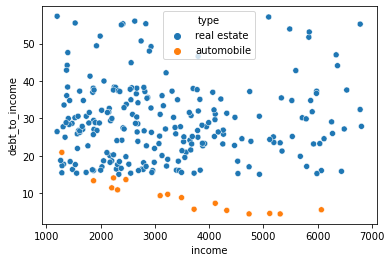

In [93]:
sns.scatterplot(data = loans , x ="income" , y = "debt_to_income" , hue="type")

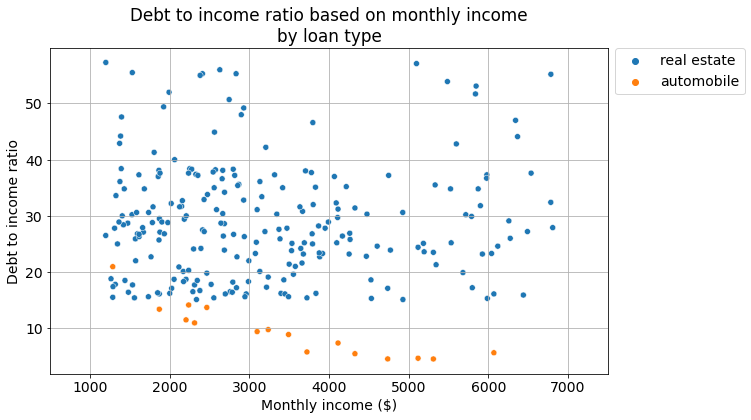

In [94]:
plt.figure(figsize=(10,6))

plt.rcParams.update({'font.size': 14})

sns.scatterplot(data=loans, x='income', y='debt_to_income', hue='type')

plt.ylabel("Debt to income ratio")

plt.xlabel('Monthly income ($)')

plt.grid()

plt.xlim(500, 7500)

plt.legend(bbox_to_anchor=(1, 1.02))

plt.title("Debt to income ratio based on monthly income\nby loan type")

plt.show()

<AxesSubplot:xlabel='city', ylabel='repayment'>

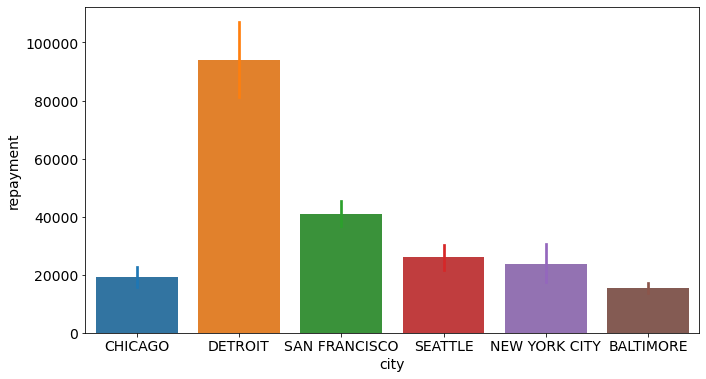

In [104]:
plt.figure(figsize=(11,6))
sns.barplot(data=loans , x="city" , y="repayment" , errcolor=None ,errwidth=None, estimator
        =sum)

<AxesSubplot:xlabel='city', ylabel='repayment'>

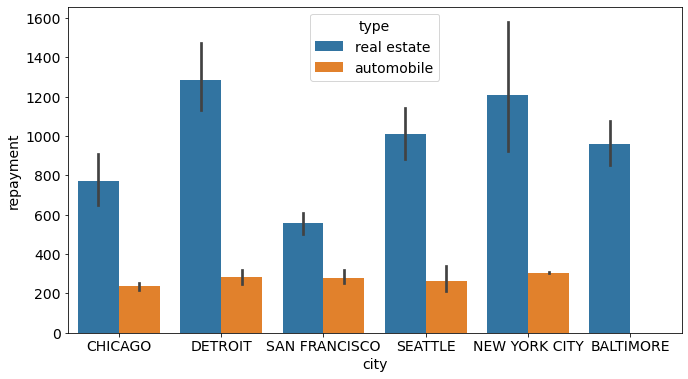

In [111]:
plt.figure(figsize=(11,6))
sns.barplot(data=loans, x='city', y='repayment', errorbar=None, estimator=np.mean, hue='type')

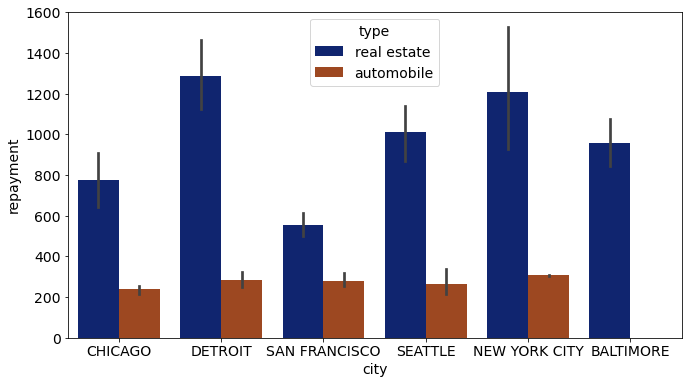

In [120]:
plt.figure(figsize=(11,6))
sns.barplot(data=loans, x='city', y='repayment', estimator=np.mean, hue='type')

sns.set_palette('dark')

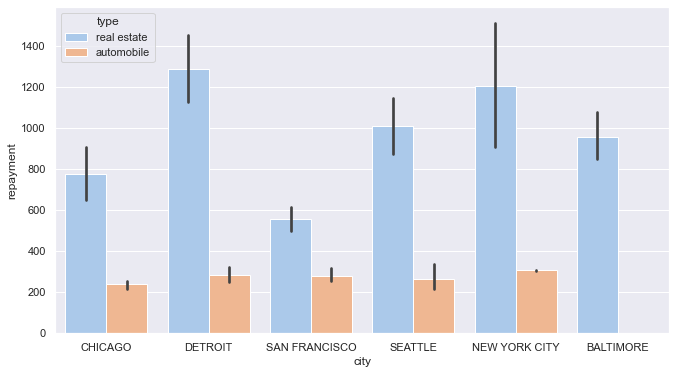

In [128]:
plt.figure(figsize=(11,6))
sns.barplot(data=loans, x='city', y='repayment', estimator=np.mean, hue='type')
sns.set_palette('pastel')
sns.set_theme(style="whitegrid" , palette="pastel")

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
loans = pd.read_csv('https://raw.githubusercontent.com/OpenClassrooms-Student-Center/en-8253136-Use-Python-Libraries-for-Data-Science/main/data/loans_final.csv')

loans.head()

,identifier,city,zip code,income,repayment,term,type,interest_rate,debt_to_income,total_cost,profit,risk
0,0,CHICAGO,60100,3669.0,1130.05,240,real estate,1.168,30.80,271212.0,131.99,No
1,1,DETROIT,48009,5310.0,240.00,64,automobile,3.701,4.52,15360.0,23.69,No
2,1,DETROIT,48009,5310.0,1247.85,300,real estate,1.173,23.50,374355.0,182.97,No
3,2,SAN FRANCISCO,94010,1873.0,552.54,240,real estate,0.972,29.50,132609.6,53.71,No
4,3,SAN FRANCISCO,94010,1684.0,586.03,180,real estate,1.014,34.80,105485.4,44.57,No
